# Basic Linear Algebra in PyTorch (Live Demo)


## Introduction

In this demo, we'll explore how PyTorch implements linear algebra operations efficiently. Note for this notebook to run, you'll need to have the utils.py file in the same directory as the notebook.

First, we'll import the necessary libraries and setup our environment:

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from utils import *

# Set random seed for reproducibility
torch.manual_seed(42)

def visualize_vector_geometry(v1, v2):
    """Visualize two vectors, their angle, and projection."""
    # Create figure with square aspect ratio
    plt.figure(figsize=(8, 8))
    
    # Calculate projection
    proj_scalar = torch.dot(v1, v2) / torch.dot(v2, v2)
    proj = proj_scalar * v2
    print('projection length:', torch.norm(proj))
    print('original vector length:', torch.norm(v1))
    
    # Plot vectors
    plt.quiver(0, 0, v1[0].item(), v1[1].item(), angles='xy', scale_units='xy', scale=1, 
              color='blue', label='v1', width=0.008)
    plt.quiver(0, 0, v2[0].item(), v2[1].item(), angles='xy', scale_units='xy', scale=1, 
              color='red', label='v2', width=0.008)
    plt.quiver(0, 0, proj[0].item(), proj[1].item(), angles='xy', scale_units='xy', scale=1, 
              color='green', label='projection', width=0.008)
    
    # Draw dashed line from tip of projection to tip of v1
    plt.plot([proj[0].item(), v1[0].item()], [proj[1].item(), v1[1].item()], 'k--', alpha=0.3)
    
    # Set bounds with padding
    max_coord = max(torch.max(torch.abs(v1)), torch.max(torch.abs(v2))).item() * 1.5
    plt.xlim(-max_coord, max_coord)
    plt.ylim(-max_coord, max_coord)
    
    # Add grid, labels, and title
    plt.grid(True)
    plt.legend()
    plt.title('Vector Geometry')
    plt.xlabel('x')
    plt.ylabel('y')
    
    # Ensure equal aspect ratio
    plt.axis('equal')
    plt.show()

## Part 1: Vectors and Tensors

### Creating Tensors

Let's explore different ways to create tensors:

In [2]:
# 1. Creating from data
temps = torch.tensor([22.5, 23.1, 21.8])
print(f"Vector shape: {temps.shape}")  # torch.Size([3])

Vector shape: torch.Size([3])


In [3]:
# 2. Creating initialized tensors
zeros = torch.zeros(3)
print(f"Zeros shape: {zeros.shape}")  # torch.Size([3])

Zeros shape: torch.Size([3])


In [4]:
# 3. Creating random tensors
weekly = torch.randn(7, 3)  # 7 days, 3 readings per day
print(f"Matrix shape: {weekly.shape}")  # torch.Size([7, 3])

Matrix shape: torch.Size([7, 3])


In [5]:
# Common Mistake: Default dtype
z = torch.tensor([1, 2, 3])  # What dtype will this be?
print(f"z dtype: {z.dtype}")  # Will be int64, not float32!

z dtype: torch.int64


### Basic Vector Operations

First, let's create two example vectors:

In [6]:
x = torch.tensor([1.0, 2.0, 3.0])
y = torch.tensor([2.0, 3.0, 4.0])
print("x:", x)
print("y:", y)

x: tensor([1., 2., 3.])
y: tensor([2., 3., 4.])


Let's explore basic operations:

1. Vector Addition:

In [7]:
z = x + y
print("x + y =", z)  # Expected: [3., 5., 7.]

x + y = tensor([3., 5., 7.])


2. Scalar Multiplication:

In [8]:
z = 2 * x
print("2 * x =", z)  # Expected: [2., 4., 6.]

2 * x = tensor([2., 4., 6.])


3. Dot Product:

In [9]:
# dot_product = x₁y₁ + x₂y₂ + x₃y₃
dot_prod = torch.dot(x, y)
print("x · y =", dot_prod)  # Expected: 20 = 1*2 + 2*3 + 3*4

x · y = tensor(20.)


4. Vector Norm (Length):

In [10]:
# norm = √(x₁² + x₂² + x₃²)
norm = torch.norm(x)
print("||x|| =", norm)  # Expected: 3.7417 = √(1² + 2² + 3²)

||x|| = tensor(3.7417)


### Vector Geometry

1. Angle Between Vectors:

In [11]:
# cos(θ) = (x·y)/(||x|| ||y||)
cos_theta = torch.dot(x, y) / (torch.norm(x) * torch.norm(y))
theta = torch.acos(cos_theta)
print(f"Angle between x and y: {theta.item():.2f} radians")
print(f"Cosine similarity: {cos_theta.item():.3f}")

Angle between x and y: 0.12 radians
Cosine similarity: 0.993


2. Vector Projection:

In [12]:
# Formula: proj_x(y) = (x·y/||x||²) * x 
# This gives us the component of y that points in the direction of x
x = x.float()  # Convert x to float
y = y.float()  # Convert y to float
scalar_proj = torch.dot(x, y) / torch.dot(x, x)  # Scalar projection
proj = scalar_proj * x  # Vector projection

# Verify projection properties
print(f"Original vector y: {y}")
print(f"Vector x: {x}")
print(f"Projection of y onto x: {proj}")

# Verification: projection length should be <= original vector length
print(f"\nVerification:")
print(f"Length of y: {torch.norm(y):.4f}")
print(f"Length of projection: {torch.norm(proj):.4f}")

# The difference vector (y - proj) should be orthogonal to x
diff = y - proj
cos_angle = torch.dot(diff, x) / (torch.norm(diff) * torch.norm(x))
print(f"Cosine of angle between difference and x: {cos_angle:.2e}")  # Should be ~0

Original vector y: tensor([2., 3., 4.])
Vector x: tensor([1., 2., 3.])
Projection of y onto x: tensor([1.4286, 2.8571, 4.2857])

Verification:
Length of y: 5.3852
Length of projection: 5.3452
Cosine of angle between difference and x: 9.73e-08


3. Visualization:

projection length: tensor(5.3452)
original vector length: tensor(5.3852)


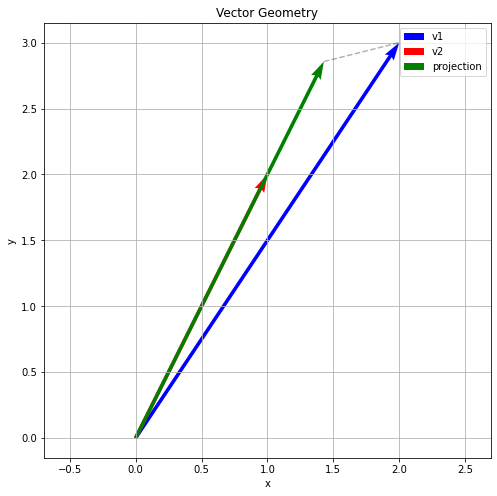


Key Properties of Vector Projection:
1. Projection vector points in same direction as y
2. Projection length ≤ original vector length
3. (x - projection) is orthogonal to y


In [13]:
# Visualize vectors, angle, and projection
visualize_vector_geometry(y,x)
print("\nKey Properties of Vector Projection:")
print("1. Projection vector points in same direction as y")
print("2. Projection length ≤ original vector length")
print("3. (x - projection) is orthogonal to y")

### From Vectors to Matrices

Now that we understand vector operations and geometry, let's see how these concepts extend to matrices (2D tensors) and higher dimensions. Matrix operations are built from vector operations:

- Matrix addition: Adding corresponding vectors (rows/columns)
- Matrix-vector product: Multiple dot products
- Matrix-matrix product: Multiple matrix-vector products

Let's see this in action:

In [14]:
# Create example vectors and matrices
v = torch.tensor([1., 2., 3.])
A = torch.tensor([[1., 2., 3.],
                 [4., 5., 6.]])
print("Vector v:", v)
print("\nMatrix A:")
print(A)

Vector v: tensor([1., 2., 3.])

Matrix A:
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [15]:
# 1. Matrix row as vector operation
print("First row of A as vector:", A[0,:])  # Just like our vector v
print("Dot product with v:", torch.dot(A[0,:], v))  # Same as before!

# 2. Matrix-vector product (multiple dot products)
result = A @ v  # Each element is a dot product
print("\nMatrix-vector product A @ v:")
print(result)
print("\nVerify first element:", torch.dot(A[0,:], v))  # Same as manual calculation
print("Verify second element:", torch.dot(A[1,:], v))

# Think about: How would changing the matrix layout (row-major vs column-major)
# affect the performance of matrix-vector multiplication? Why?

First row of A as vector: tensor([1., 2., 3.])
Dot product with v: tensor(14.)

Matrix-vector product A @ v:
tensor([14., 32.])

Verify first element: tensor(14.)
Verify second element: tensor(32.)


Common mistakes to watch for:

In [16]:
try:
    # Wrong: trying to dot product matrix with vector
    wrong = torch.dot(A, v)
except RuntimeError as e:
    print("Error:", e)
    print("\nWhy? torch.dot is for 1D vectors only!")
    print("Use @ for matrix-vector multiplication")

Error: 1D tensors expected, but got 2D and 1D tensors

Why? torch.dot is for 1D vectors only!
Use @ for matrix-vector multiplication


Now let's look at higher dimensions:

In [17]:
# Create a 2×3 matrix directly from data
A = torch.tensor([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0]])
print("Matrix A:")
print(A)
print("Shape:", A.shape)  # torch.Size([2, 3])
print("dtype:", A.dtype)  # torch.float32

Matrix A:
tensor([[1., 2., 3.],
        [4., 5., 6.]])
Shape: torch.Size([2, 3])
dtype: torch.float32


In [18]:
# Create a 3D tensor (think of it as a stack of matrices)
B = torch.randn(2, 3, 4)  # 2 matrices, each 3×4
print("3D Tensor B:")
print(B)
print("Shape:", B.shape)  # torch.Size([2, 3, 4])

# Visualize the structure:
print("\n3D Tensor Structure:")
print("Layer 0:")
print(B[0])
print("\nLayer 1:")
print(B[1])

3D Tensor B:
tensor([[[-0.4245,  0.3057, -0.7746,  0.0349],
         [ 0.3211,  1.5736, -0.8455,  1.3123],
         [ 0.1754,  1.3852, -0.4459,  1.4451]],

        [[ 0.8564,  2.2181,  0.5232,  0.3466],
         [ 0.5612, -0.4527, -0.7718, -0.1722],
         [ 0.5238,  0.0566,  0.4263,  0.5750]]])
Shape: torch.Size([2, 3, 4])

3D Tensor Structure:
Layer 0:
tensor([[-0.4245,  0.3057, -0.7746,  0.0349],
        [ 0.3211,  1.5736, -0.8455,  1.3123],
        [ 0.1754,  1.3852, -0.4459,  1.4451]])

Layer 1:
tensor([[ 0.8564,  2.2181,  0.5232,  0.3466],
        [ 0.5612, -0.4527, -0.7718, -0.1722],
        [ 0.5238,  0.0566,  0.4263,  0.5750]])


In [19]:
# Vector operations extend naturally to matrices
print("Sum along rows (dim=1):", A.sum(dim=1))       # Expected: tensor([6., 15.])
print("Mean along columns (dim=0):", A.mean(dim=0))  # Expected: tensor([2.5, 3.5, 4.5])
print("Maximum value:", A.max())                     # Expected: tensor(6.)

# Note: dimensions work like this:
#   dim=0 → ↓ (down columns)
#   dim=1 → → (across rows)
#   dim=2 → ↗ (into depth, for 3D)

Sum along rows (dim=1): tensor([ 6., 15.])
Mean along columns (dim=0): tensor([2.5000, 3.5000, 4.5000])
Maximum value: tensor(6.)


### Memory Layout and Performance

Modern computers use a hierarchy of memory systems, from very fast but small (CPU cache) to slower but large (RAM). Understanding this hierarchy is crucial for writing efficient code:

#### What is a Cache?
Think of computer memory like a library:
- Main Memory (RAM) is like the library building - lots of storage, but far away
- Cache is like your desk - tiny space (typically 32KB), but very fast access
- When you read data, the computer brings it AND nearby data to the cache
- If the next piece of data you need is already in cache - very fast!
- If it's back in main memory - slow, need to fetch it

Before looking at the timing results below, predict:
- Which operation will be faster: summing along rows or columns?
- How will the matrix shape affect performance?

#### 1. Basic Memory Layout

In [20]:
# Create a simple matrix
A = torch.tensor([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])

print("What we see (2D array):")
print(A)
print("\nHow it's stored (1D array):")
print("[1 2 3 4 5 6 7 8 9]")

What we see (2D array):
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

How it's stored (1D array):
[1 2 3 4 5 6 7 8 9]


#### 2. Access Patterns

In [21]:
# Row access (fast: adjacent elements)
print("Row access A[0,:]:")
print(A[0,:])  # Elements 1,2,3 are next to each other

# Column access (slower: need to jump)
print("\nColumn access A[:,0]:")
print(A[:,0])  # Need to jump 3 steps: 1,4,7

Row access A[0,:]:
tensor([1, 2, 3])

Column access A[:,0]:
tensor([1, 4, 7])


#### 3. Understanding Timing and Performance Measurements

When measuring performance in Python, we use several metrics:

1. **Wall Time** (Real Time):
   - What you'd measure with a stopwatch
   - Usually LOWER than CPU time due to parallel execution
   - Most relevant for "how long did I wait?"

2. **CPU Time** (Computation Time):
   - **User Time**: Time spent in your code
   - **System Time**: Time spent in OS calls
   - **Total Time**: User + System time
   - Can be HIGHER than wall time due to parallel execution

For example, if an operation uses 4 CPU cores for 0.25 seconds each:
- Wall Time: ~0.25 seconds (real elapsed time)
- CPU Time: ~1.0 second (total computation across cores)

```ascii
Wall Time:  [==========] 0.25s
CPU Time:   [===][===][===][===] 1.0s (across 4 cores)
```

When we use `%timeit`, we see output like:
```
238 µs ± 42.3 µs per loop (mean ± std. dev. of 2 runs, 3 loops each)
```

This means:
- Each measurement runs the code 3 times ("3 loops")
- This whole process is repeated 2 times ("2 runs")
- The mean time per loop is 238 microseconds
- The standard deviation is 42.3 microseconds
- Multiple runs/loops help account for system variability

Let's see this in action:

In [22]:
# Create test matrices
wide = torch.randn(100, 1000)   # Wide: big column jumps
tall = torch.randn(1000, 100)   # Tall: smaller column jumps

print("Wide Matrix (100×1000) Operations:")
print("1. Sum along rows (adjacent elements):")
%time _ = torch.sum(wide, dim=1)  # One measurement

print("\n2. Same operation with detailed timing:")
%timeit -n 3 -r 2 _ = torch.sum(wide, dim=1)  # Multiple measurements

print("\nWhy is wall time often lower than CPU time?")
print("- PyTorch uses multiple CPU cores")
print("- While you waited 0.25s (wall time)")
print("- 4 cores might each work 0.25s (1.0s CPU time)")

Wide Matrix (100×1000) Operations:
1. Sum along rows (adjacent elements):
CPU times: user 446 µs, sys: 470 µs, total: 916 µs
Wall time: 608 µs

2. Same operation with detailed timing:
29.9 µs ± 3.6 µs per loop (mean ± std. dev. of 2 runs, 3 loops each)

Why is wall time often lower than CPU time?
- PyTorch uses multiple CPU cores
- While you waited 0.25s (wall time)
- 4 cores might each work 0.25s (1.0s CPU time)


#### 4. Shape Effects on Performance
First, let's create matrices with different shapes:

In [23]:
# Create test matrices
wide = torch.randn(3000, 5000)   # Wide: big column jumps
tall = torch.randn(5000, 3000)   # Tall: smaller column jumps

Let's time wide matrix operations:

In [24]:
print("Wide Matrix wide.shape:", wide.shape)
print("Sum along rows (adjacent elements):")
%time _ = torch.sum(wide, dim=1)
print("\nSum along columns (1000-element jumps):")
%time _ = torch.sum(wide, dim=0)

Wide Matrix wide.shape: torch.Size([3000, 5000])
Sum along rows (adjacent elements):
CPU times: user 3.84 ms, sys: 808 µs, total: 4.65 ms
Wall time: 1.01 ms

Sum along columns (1000-element jumps):
CPU times: user 8.8 ms, sys: 2.47 ms, total: 11.3 ms
Wall time: 1.78 ms


Now tall matrix operations:

In [25]:
print("Tall Matrix tall.shape:", tall.shape)
print("Sum along rows (adjacent elements):")
%time _ = torch.sum(tall, dim=1)
print("\nSum along columns (100-element jumps):")
%time _ = torch.sum(tall, dim=0)

Tall Matrix tall.shape: torch.Size([5000, 3000])
Sum along rows (adjacent elements):
CPU times: user 4.23 ms, sys: 1.68 ms, total: 5.92 ms
Wall time: 1.32 ms

Sum along columns (100-element jumps):
CPU times: user 9.91 ms, sys: 1.65 ms, total: 11.6 ms
Wall time: 1.71 ms


#### Key Takeaways
1. Row Operations:
   - Always fast (adjacent memory)
   - Same speed regardless of shape
   - No noticeable difference for small matrices

2. Column Operations:
   - Speed depends on matrix width
   - Wide matrices: large jumps = slower
   - Tall matrices: small jumps = faster
   - Only noticeable for large matrices

3. Matrix Size Effects (M1 Pro):
   - Matrices < 1500x1500: minimal difference
   - 1500x1500 to 3000x3000: moderate difference
   - > 3000x3000: significant slowdown for column ops
   - Due to L1/L2/system cache sizes (128KB/12MB/24MB)

4. Rule of Thumb:
   - Keep "jump size" (matrix width) small for column operations
   - Choose shape based on most common access pattern
   - Only optimize if working with large matrices (>3000 dimension)

## Part 2: Matrix Operations

### Matrix Multiplication

Why are vectorized operations much faster than loops? Three key reasons:

1. **BLAS (Basic Linear Algebra Subprograms)**
   - Highly optimized C/Fortran implementations
   - Cache-friendly memory access patterns
   - Decades of performance optimization

2. **SIMD (Single Instruction Multiple Data)**
   - CPU can process 4-8 elements simultaneously
   - Like a conveyor belt vs moving boxes one at a time

3. **Memory Access**
   - Loops: Random access, more cache misses
   - Vectorized: Optimized patterns, better cache usage

Let's see this in action:

In [26]:
# Create larger matrices for more obvious timing differences
A = torch.randn(500, 500)  # Reduced from 1000
B = torch.randn(500, 500)

# Warmup runs (PyTorch does runtime optimization)
for _ in range(2):  # Reduced from 5
    _ = A @ B

In [27]:
# Method 1: Vectorized multiplication
print("Vectorized (@):")
%timeit -n 3 -r 2 C1 = A @ B  # Reduced iterations

Vectorized (@):
341 µs ± 84.3 µs per loop (mean ± std. dev. of 2 runs, 3 loops each)


In [28]:
# Method 2: Manual multiplication with loops
def manual_matmul(A, B):
    m, n = A.shape
    p = B.shape[1]
    C = torch.zeros(m, p)
    for i in range(m):
        for j in range(p):
            C[i,j] = torch.sum(A[i,:] * B[:,j])
    return C

print("Manual loops:")
%timeit -n 3 -r 2 C2 = manual_matmul(A, B)  # Reduced iterations

Manual loops:
2.65 s ± 10.4 ms per loop (mean ± std. dev. of 2 runs, 3 loops each)


In [29]:
# Verify results match
C1 = A @ B
C2 = manual_matmul(A, B)

# Check if results match within a tolerance
# We use a relative tolerance because values can be large
rtol = 1e-4  # relative tolerance
atol = 1e-6  # absolute tolerance

matches = torch.allclose(C1, C2, rtol=rtol, atol=atol)
if matches:
    print("Results match within tolerance!")
else:
    # If they don't match, let's see why
    diff = torch.abs(C1 - C2)
    max_diff = torch.max(diff)
    print(f"Maximum difference: {max_diff:.2e}")
    print(f"Relative to matrix magnitude: {max_diff/torch.max(torch.abs(C1)):.2e}")
    print("\nWhy might they differ?")
    print("1. Floating point arithmetic order matters")
    print("2. PyTorch uses optimized BLAS libraries")
    print("3. Manual implementation might accumulate errors")

Maximum difference: 1.14e-04
Relative to matrix magnitude: 1.07e-06

Why might they differ?
1. Floating point arithmetic order matters
2. PyTorch uses optimized BLAS libraries
3. Manual implementation might accumulate errors


# Matrix Multiplication Error Handling

Let's understand common errors and how to debug them:

In [30]:
A = torch.randn(3, 4)
B = torch.randn(3, 4)

# This works (element-wise multiplication)
C1 = A * B
print("Element-wise multiplication shape:", C1.shape)

# This is matrix multiplication
C2 = A @ B.T  # Need to transpose B
print("Matrix multiplication shape:", C2.shape)

print("\nKey Differences:")
print("* (A * B): Element-wise, same shapes required")
print("@ (A @ B): Matrix product, inner dimensions must match")

Element-wise multiplication shape: torch.Size([3, 4])
Matrix multiplication shape: torch.Size([3, 3])

Key Differences:
* (A * B): Element-wise, same shapes required
@ (A @ B): Matrix product, inner dimensions must match


Common Mistakes Summary:
1. Shape Mismatch: Inner dimensions must match
2. Dimension Issues: Be careful with 1D vs 2D
3. Operation Confusion: * vs @ have different rules

# Common Mistakes and How to Fix Them

## 1. Matrix Operation Confusion

In [31]:
# Create two matrices of the same size
A = torch.tensor([[1., 2.], 
                 [3., 4.]])
B = torch.tensor([[5., 6.],
                 [7., 8.]])

# Mistake: Confusing * with @
print("Matrix A:")
print(A)
print("\nMatrix B:")
print(B)

print("\n1. Element-wise multiplication (*):")
C1 = A * B
print(C1)
print("Result explanation: Each element multiplied independently")
print("(1*5=5, 2*6=12, 3*7=21, 4*8=32)")

print("\n2. Matrix multiplication (@):")
C2 = A @ B
print(C2)
print("Result explanation: Matrix product")
print("([1*5 + 2*7, 1*6 + 2*8], [3*5 + 4*7, 3*6 + 4*8])")

print("\nKey Difference:")
print("* : Element-wise → Shape stays same")
print("@ : Matrix product → Shape can change")

Matrix A:
tensor([[1., 2.],
        [3., 4.]])

Matrix B:
tensor([[5., 6.],
        [7., 8.]])

1. Element-wise multiplication (*):
tensor([[ 5., 12.],
        [21., 32.]])
Result explanation: Each element multiplied independently
(1*5=5, 2*6=12, 3*7=21, 4*8=32)

2. Matrix multiplication (@):
tensor([[19., 22.],
        [43., 50.]])
Result explanation: Matrix product
([1*5 + 2*7, 1*6 + 2*8], [3*5 + 4*7, 3*6 + 4*8])

Key Difference:
* : Element-wise → Shape stays same
@ : Matrix product → Shape can change


## 2. Type Coercion Edge Cases

In [32]:
# Create tensors with different dtypes
x = torch.tensor([1, 2, 3])                    # default: int64
y = torch.tensor([4., 5., 6.])                 # default: float32
z = torch.tensor([7, 8, 9], dtype=torch.int32) # explicit: int32

print("Tensor dtypes:")
print(f"x (int64): {x.dtype}")
print(f"y (float32): {y.dtype}")
print(f"z (int32): {z.dtype}")

# Case 1: Mixed integer types
try:
    result = x + z  # int64 + int32
    print("\nMixed integer addition works!")
    print(f"Result dtype: {result.dtype}")  # Promotes to int64
except RuntimeError as e:
    print("\nError:", e)

# Case 2: Integer and float
try:
    result = x + y  # int64 + float32
    print("\nInteger + float works!")
    print(f"Result dtype: {result.dtype}")  # Promotes to float32
except RuntimeError as e:
    print("\nError:", e)

print("\nKey Points:")
print("1. Mixed integer types promote to larger type")
print("2. Integer + float promotes to float")
print("3. When in doubt, explicitly convert using .to(dtype)")

Tensor dtypes:
x (int64): torch.int64
y (float32): torch.float32
z (int32): torch.int32

Mixed integer addition works!
Result dtype: torch.int64

Integer + float works!
Result dtype: torch.float32

Key Points:
1. Mixed integer types promote to larger type
2. Integer + float promotes to float
3. When in doubt, explicitly convert using .to(dtype)


## 3. Shape Compatibility in Practice

In [33]:
# Create tensors of various shapes
A = torch.randn(2, 3)      # 2×3 matrix
B = torch.randn(3, 2)      # 3×2 matrix
v = torch.randn(3)         # Vector of size 3

print("Shape analysis:")
print(f"A: {A.shape}")
print(f"B: {B.shape}")
print(f"v: {v.shape}")

# Valid operations
print("\nValid operations:")
print("1. Matrix multiplication (A @ B):", (A @ B).shape)
print("2. Matrix-vector product (A @ v):", (A @ v).shape)
print("3. Vector-matrix product (v @ A.T):", (v @ A.T).shape)

# Common mistakes
print("\nCommon shape confusions:")
print("Q: Why does A @ v work but v @ A fail?")
print("A: PyTorch treats v as column vector for A @ v")
print("   but as row vector for v @ A")
print("\nQ: Why does v @ A.T work but v @ A fail?")
print("A: Need matching inner dimensions:")
print("   v @ A.T is (3) @ (3×2) → (2)")
print("   v @ A would be (3) @ (2×3) → Error!")

Shape analysis:
A: torch.Size([2, 3])
B: torch.Size([3, 2])
v: torch.Size([3])

Valid operations:
1. Matrix multiplication (A @ B): torch.Size([2, 2])
2. Matrix-vector product (A @ v): torch.Size([2])
3. Vector-matrix product (v @ A.T): torch.Size([2])

Common shape confusions:
Q: Why does A @ v work but v @ A fail?
A: PyTorch treats v as column vector for A @ v
   but as row vector for v @ A

Q: Why does v @ A.T work but v @ A fail?
A: Need matching inner dimensions:
   v @ A.T is (3) @ (3×2) → (2)
   v @ A would be (3) @ (2×3) → Error!


## Key Points to Remember:
1. Always check tensor dtypes when creating from data
2. Verify dimensions exist before reduction operations
3. Understand * vs @ for multiplication
4. Use unsqueeze/squeeze for broadcasting
5. Consider memory layout for performance
6. Check shape compatibility before operations





# Broadcasting in PyTorch

Broadcasting allows us to perform operations between tensors of different shapes. Let's understand the rules and patterns:

In [34]:
# 1. Vector + Scalar
v = torch.tensor([1., 2., 3.])
s = 10.

print("Vector + Scalar:")
print(f"v: {v.shape} →\n{v}")
print(f"s: {s}")
print(f"v + s →\n{v + s}")
print("\nBroadcasting: scalar is repeated to match vector shape")

Vector + Scalar:
v: torch.Size([3]) →
tensor([1., 2., 3.])
s: 10.0
v + s →
tensor([11., 12., 13.])

Broadcasting: scalar is repeated to match vector shape


In [35]:
# 2. Matrix + Vector (along rows)
A = torch.tensor([[1., 2., 3.],
                 [4., 5., 6.]])
v = torch.tensor([10., 20., 30.])

print("Matrix + Vector (rows):")
print(f"A: {A.shape} →\n{A}")
print(f"v: {v.shape} →\n{v}")
print(f"A + v →\n{A + v}")

print("\nBroadcasting steps:")
print("1. v shape:     (3,)")
print("2. Add dim:     (1, 3)")
print("3. Broadcast:   (2, 3)  # Repeated to match rows")

Matrix + Vector (rows):
A: torch.Size([2, 3]) →
tensor([[1., 2., 3.],
        [4., 5., 6.]])
v: torch.Size([3]) →
tensor([10., 20., 30.])
A + v →
tensor([[11., 22., 33.],
        [14., 25., 36.]])

Broadcasting steps:
1. v shape:     (3,)
2. Add dim:     (1, 3)
3. Broadcast:   (2, 3)  # Repeated to match rows


In [36]:
# 3. Matrix + Vector (along columns)
v = torch.tensor([[10.], [20.]])  # Column vector

print("Matrix + Vector (columns):")
print(f"A: {A.shape} →\n{A}")
print(f"v: {v.shape} →\n{v}")
print(f"A + v →\n{A + v}")

print("\nBroadcasting steps:")
print("1. v shape:     (2, 1)")
print("2. Broadcast:   (2, 3)  # Repeated to match columns")

Matrix + Vector (columns):
A: torch.Size([2, 3]) →
tensor([[1., 2., 3.],
        [4., 5., 6.]])
v: torch.Size([2, 1]) →
tensor([[10.],
        [20.]])
A + v →
tensor([[11., 12., 13.],
        [24., 25., 26.]])

Broadcasting steps:
1. v shape:     (2, 1)
2. Broadcast:   (2, 3)  # Repeated to match columns


In [37]:
# 4. Matrix * Vector Broadcasting Example
A = torch.tensor([[22.5, 23.1, 21.8],
                 [21.0, 22.5, 20.9],
                 [23.1, 24.0, 22.8]])  # [3,3] matrix
v = torch.tensor([1.02, 0.98, 1.01])   # [3] vector

print("Matrix * Vector Broadcasting:")
print(f"Matrix A: {A.shape} →\n{A}")
print(f"Vector v: {v.shape} →\n{v}")
print(f"A * v →\n{A * v}")

print("\nBroadcasting steps:")
print("1. v shape:     (3,)")
print("2. Add dim:     (1, 3)")
print("3. Broadcast:   (3, 3)  # Repeated to match rows")
print("4. Result:      Each column multiplied by corresponding v element")

# Verify specific results from image
print("\nVerifying specific results:")
print(f"First row:  {A[0,0]*v[0]:.2f}, {A[0,1]*v[1]:.2f}, {A[0,2]*v[2]:.2f}")
print(f"Second row: {A[1,0]*v[0]:.2f}, {A[1,1]*v[1]:.2f}, {A[1,2]*v[2]:.2f}")
print(f"Third row:  {A[2,0]*v[0]:.2f}, {A[2,1]*v[1]:.2f}, {A[2,2]*v[2]:.2f}")

Matrix * Vector Broadcasting:
Matrix A: torch.Size([3, 3]) →
tensor([[22.5000, 23.1000, 21.8000],
        [21.0000, 22.5000, 20.9000],
        [23.1000, 24.0000, 22.8000]])
Vector v: torch.Size([3]) →
tensor([1.0200, 0.9800, 1.0100])
A * v →
tensor([[22.9500, 22.6380, 22.0180],
        [21.4200, 22.0500, 21.1090],
        [23.5620, 23.5200, 23.0280]])

Broadcasting steps:
1. v shape:     (3,)
2. Add dim:     (1, 3)
3. Broadcast:   (3, 3)  # Repeated to match rows
4. Result:      Each column multiplied by corresponding v element

Verifying specific results:
First row:  22.95, 22.64, 22.02
Second row: 21.42, 22.05, 21.11
Third row:  23.56, 23.52, 23.03


![Broadcasting visualization showing how vector v multiplies each column of matrix A](figures/broadcasting.png)

Finally, one last example:

In [38]:
# 5. More complex shapes
a = torch.randn(3, 1, 5)
b = torch.randn(1, 4, 5)
print(f"a shape: {a.shape}")
print(f"b shape: {b.shape}")

# Think about it...
print("\nBroadcasting steps:")
print("a: (3, 1, 5) → (3, 4, 5)")
print("b: (1, 4, 5) → (3, 4, 5)")
print(f"Result shape: {(a + b).shape}")

a shape: torch.Size([3, 1, 5])
b shape: torch.Size([1, 4, 5])

Broadcasting steps:
a: (3, 1, 5) → (3, 4, 5)
b: (1, 4, 5) → (3, 4, 5)
Result shape: torch.Size([3, 4, 5])


Key Broadcasting Rules:
1. Add leading dimensions of size 1 to match ranks
2. Size 1 dimensions are stretched to match
3. Dimensions must be equal or one must be 1
4. Operations work element-wise after broadcasting


# SVD: Finding Patterns in Data

SVD (Singular Value Decomposition) reveals structure in data by factoring a matrix A into orthogonal components: A = UΣVᵀ. Let's understand the key properties:

1. $U^TU = I$, $V^TV = I$ (orthogonal)
2. $\sigma_1 \geq \sigma_2 \geq \cdots \geq 0$ (ordered singular values)
3. $\text{rank}(A) = \#\{\sigma_i > 0\}$ (rank equals number of non-zero singular values)

The key points 
- Factorizations of a matrix are just generally useful. We will see more examples later.
- This one is useful because it gives us a way to ISOLATE and RANK certain patterns in data.
- For a given $n\times n$ matrix $A$, the SVD gives $n$ patterns, ordered by "importance."
- We will measure the "importance" by the size of the singular values.
- The patterns are given by $u_iv_i^T$, were $u_i$ are the column of $U$ and $v_i$ are the column of $V$.
    - these are called the "left" and "right" singular vectors.
- Then we can use the patterns to partially reconstruct the matrix $A$ by taking the sum of the top $k$ patterns:
    - $A_k = \sum_{i=1}^k \sigma_i u_i v_i^T$
    - this is called the "rank-$k$ approximation" of $A$.
    - It is actually a rank $k$ matrix!
- We will see a theorem in a second that shows this is the best possible rank-$k$ approximation.
- For now, how do we measure "best"? With a matrix norm!

## Matrix Norms and Energy

The Frobenius norm measures the total energy in a matrix:

$$\|A\|_F = \sqrt{\sum_{i,j} a_{ij}^2} = \sqrt{\sum_{i=1}^r \sigma_i^2}$$

This norm is natural because:
1. It treats matrices as vectors in $\mathbb{R}^{mn}$
2. It's rotationally invariant: $\|A\|_F = \|U^t A V \|_F = \|S\|_F$
3. It decomposes via singular values: $\|A\|_F = \sqrt{\sum_i \sigma_i^2}$

Thus, there are three ways to compute the norm of a matrix:
1. As a vector norm of the flattened matrix.
2. Using the built-in Frobenius norm.
3. Using the singular values.

In [39]:
# Computing Frobenius norm
A = torch.tensor([[200., 50.], [50., 200.]])

# Method 1: As vector norm of flattened matrix
norm1 = torch.norm(A.reshape(-1))
print("Method 1 (flatten):", norm1)

# Method 2: Using built-in Frobenius norm
norm2 = torch.norm(A, p='fro')
print("Method 2 (built-in):", norm2)

# Verify they're equal
print("\nMethods match:", torch.allclose(norm1, norm2))

# Compute from singular values
U, S, V = torch.linalg.svd(A)
norm3 = torch.sqrt(torch.sum(S**2))
print("Method 3 (from SVD):", norm3)

Method 1 (flatten): tensor(291.5476)
Method 2 (built-in): tensor(291.5476)

Methods match: True
Method 3 (from SVD): tensor(291.5476)


## Optimal Low-Rank Approximation

The Eckart-Young-Mirsky theorem states that SVD gives the best possible low-rank approximation:

$$\min_{\text{rank}(B) \leq k} \|A - B\|_F = \|A - A_k\|_F = \sqrt{\sum_{i=k+1}^r \sigma_i^2}$$

Key implications:
1. Truncated SVD gives optimal approximation
2. Error equals discarded singular values
3. Measured in Frobenius norm

Let's verify this empirically:

In [40]:
def reconstruct(U, S, V, k):
    """Reconstruct matrix using k components."""
    return (U[:, :k] @ torch.diag(S[:k]) @ V[:k, :])

# Create checkerboard pattern
pattern = torch.tensor([
    [200,  50, 200,  50],
    [ 50, 200,  50, 200],
    [200,  50, 200,  50],
    [ 50, 200,  50, 200]
], dtype=torch.float)

# First, let's visualize all patterns in the decomposition
U, S, V = torch.linalg.svd(pattern)

Let's look at each individual pattern:

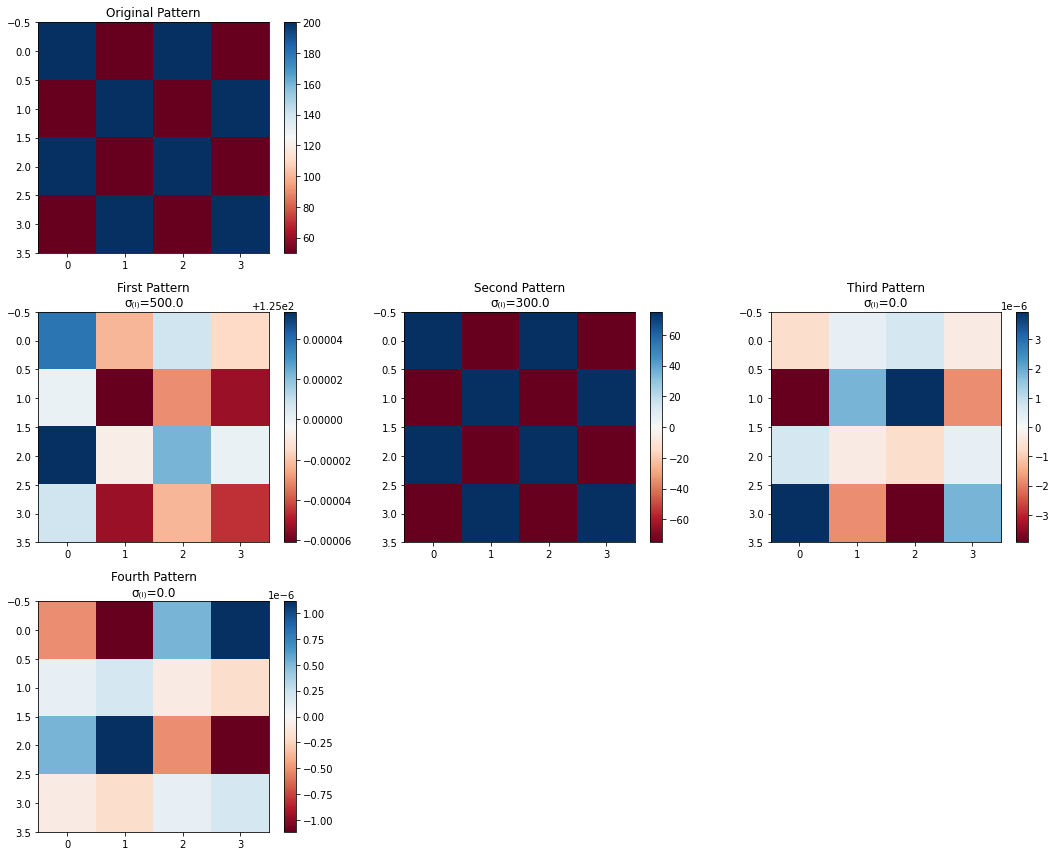

In [41]:
# Create all four rank-1 patterns
patterns = []
for i in range(4):
    pattern_i = U[:, i:i+1] @ torch.diag(S[i:i+1]) @ V[i:i+1, :]
    patterns.append(pattern_i)

# Visualization
plt.figure(figsize=(15, 12))

# 1. Original Pattern
plt.subplot(331)
plt.imshow(pattern, cmap='RdBu')
plt.title("Original Pattern")
plt.colorbar()

# 2. Individual Patterns (2×2 grid)
titles = ["First Pattern", "Second Pattern", "Third Pattern", "Fourth Pattern"]
for i in range(4):
    plt.subplot(334 + i)
    plt.imshow(patterns[i], cmap='RdBu')
    plt.title(f"{titles[i]}\nσ₍ᵢ₎={S[i]:.1f}")
    plt.colorbar()

plt.tight_layout()
plt.show()

Now let's look at cumulative reconstructions:

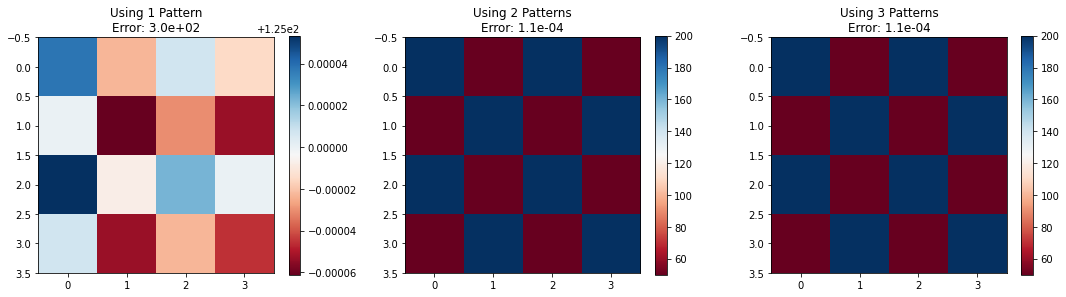

In [42]:
# 3. Cumulative Reconstructions
recons = []
for k in range(1, 5):
    recon_k = reconstruct(U, S, V, k)
    recons.append(recon_k)

# Plot cumulative reconstructions
plt.figure(figsize=(15, 4))
for i, r in enumerate(recons[:3]):  # Show first 3
    plt.subplot(131 + i)
    plt.imshow(r, cmap='RdBu')
    plt.title(f"Using {i+1} Pattern{'s' if i>0 else ''}\nError: {torch.norm(pattern - r):.1e}")
    plt.colorbar()

plt.tight_layout()
plt.show()

Let's analyze the patterns and their importance:

In [43]:
# Print pattern values and energy analysis
print("Singular Values:", S)
print("\nEnergy per pattern:")
for i, s in enumerate(S):
    energy = 100 * s**2 / torch.sum(S**2)
    print(f"Pattern {i+1}: {energy:.2f}%")

# Show actual values in first two patterns
print("\nFirst Pattern Values:")
print(patterns[0])
print("\nSecond Pattern Values:")
print(patterns[1])

print("\nReconstruction Error Analysis:")
print(f"Using 1 pattern: {torch.norm(pattern - recons[0]):.2e}")
print(f"Using 2 patterns: {torch.norm(pattern - recons[1]):.2e}")
print(f"Using 3 patterns: {torch.norm(pattern - recons[2]):.2e}")
print(f"Using 4 patterns: {torch.norm(pattern - recons[3]):.2e}")

Singular Values: tensor([5.0000e+02, 3.0000e+02, 8.8238e-06, 2.4984e-06])

Energy per pattern:
Pattern 1: 73.53%
Pattern 2: 26.47%
Pattern 3: 0.00%
Pattern 4: 0.00%

First Pattern Values:
tensor([[125.0000, 125.0000, 125.0000, 125.0000],
        [125.0000, 124.9999, 125.0000, 124.9999],
        [125.0001, 125.0000, 125.0000, 125.0000],
        [125.0000, 124.9999, 125.0000, 125.0000]])

Second Pattern Values:
tensor([[ 75.0000, -75.0000,  75.0000, -75.0000],
        [-75.0000,  75.0000, -75.0000,  75.0000],
        [ 75.0000, -75.0000,  75.0000, -75.0000],
        [-75.0000,  75.0000, -75.0000,  75.0000]])

Reconstruction Error Analysis:
Using 1 pattern: 3.00e+02
Using 2 patterns: 1.12e-04
Using 3 patterns: 1.12e-04
Using 4 patterns: 1.12e-04


Finally, let's compare SVD with random approximations:


Comparing SVD vs Random Rank-2:
SVD rank-2 error: 1.12e-04
Random rank-2 error: 5.83e+02


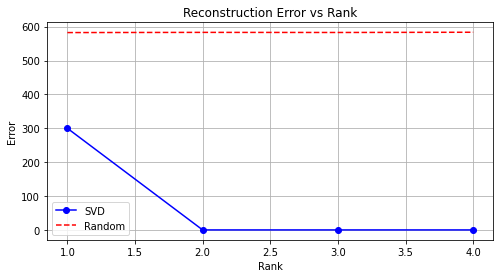

In [44]:
# Compare with random approximations
def random_rank2(shape):
    """Generate random rank-2 matrix."""
    return torch.randn(shape[0], 2) @ torch.randn(2, shape[1])

def plot_reconstruction_error(pattern, max_rank=4, n_random=5):
    """Plot reconstruction error vs rank."""
    U, S, V = torch.linalg.svd(pattern)
    
    # SVD errors
    svd_errors = []
    for k in range(1, max_rank + 1):
        approx = reconstruct(U, S, V, k)
        svd_errors.append(torch.norm(pattern - approx).item())
    
    # Random approximation errors
    rand_errors = []
    for k in range(1, max_rank + 1):
        errors = []
        for _ in range(n_random):
            rand_approx = torch.randn(pattern.shape[0], k) @ torch.randn(k, pattern.shape[1])
            errors.append(torch.norm(pattern - rand_approx).item())
        rand_errors.append(np.mean(errors))
    
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_rank + 1), svd_errors, 'bo-', label='SVD')
    plt.plot(range(1, max_rank + 1), rand_errors, 'r--', label='Random')
    plt.title("Reconstruction Error vs Rank")
    plt.xlabel("Rank")
    plt.ylabel("Error")
    plt.legend()
    plt.grid(True)
    plt.show()

# Compare SVD with random rank-2
svd_rank2 = reconstruct(U, S, V, 2)
rand_rank2 = random_rank2(pattern.shape)

print("\nComparing SVD vs Random Rank-2:")
print(f"SVD rank-2 error: {torch.norm(pattern - svd_rank2):.2e}")
print(f"Random rank-2 error: {torch.norm(pattern - rand_rank2):.2e}")

# Show error decreases with rank
plot_reconstruction_error(pattern)

The plot shows:
1. SVD error (blue) decreases optimally with rank
2. Random approximations (red) always have higher error
3. Perfect reconstruction at rank 2 with SVD

## Example Spam Detection Patterns

Let's analyze how SVD helps with spam detection. First, let's look at some example emails:

In [45]:
# Example emails
emails = [
    """URGENT!! Make MONEY Fast! Buy our amazing product now!!!
    Don't miss this INCREDIBLE opportunity to earn $$$$$
    Click here: www.suspicious-link.com""",  # Spam
    
    """CONGRATULATIONS! You've WON $10,000,000!!!
    Send your bank details NOW to claim your PRIZE!!
    Visit: www.totally-legit-money.com/claim""",  # Spam
    
    """Dear valued customer, Your ACCOUNT needs verification!
    URGENT: Click here to prevent account suspension!!!
    www.bank-security-verify.com""",  # Spam
    
    """ACT NOW!!! Limited time offer - 90% OFF!!!
    Premium watches and luxury items at INCREDIBLE prices!
    Order here: www.discount-luxury-items.com""",  # Spam
    
    """ATTENTION: Your payment was declined!!!
    Update your billing information IMMEDIATELY!
    www.account-verify-now.com""",  # Spam
    
    """Hi team, Here's the quarterly report for Q3 2023.
    Please review the attached spreadsheet and let me know
    if you have any questions.""",  # Not spam
    
    """Meeting reminder: Project sync tomorrow at 10am.
    Agenda items: 1. Sprint review 2. Planning
    Please come prepared with your updates.""",  # Not spam
    
    """Thank you for your order #12345.
    Your package has been shipped and will arrive in 2-3 days.
    Track your delivery at: shipping.legitimate-store.com""",  # Not spam
    
    """Weekly team newsletter: 
    1. New hire welcome
    2. Office updates
    3. Upcoming events""",  # Not spam
    
    """Your library book is due in 3 days.
    Please return or renew online at library.edu/renew
    Thank you for using our services."""  # Not spam
]

Now let's define our feature extraction functions:

In [46]:
# Feature extraction functions
def count_exclamations(text):
    """Count exclamation marks"""
    return text.count('!')

def count_urgent_words(text):
    """Count urgent words like 'urgent', 'now', 'act'"""
    urgent = ['urgent', 'now', 'act', 'immediate', 'fast']
    return sum(text.lower().count(word) for word in urgent)

def count_suspicious_links(text):
    """Count suspicious links (simplified)"""
    suspicious = ['.com/', 'click', 'www.']
    return sum(text.lower().count(marker) for marker in suspicious)

def compute_caps_ratio(text):
    """Compute ratio of uppercase to total letters"""
    letters = sum(c.isalpha() for c in text)
    if letters == 0:
        return 0
    caps = sum(c.isupper() for c in text)
    return caps / letters

def get_length(text):
    """Get text length"""
    return len(text)

Let's extract features from our emails:

In [47]:
# Extract features from emails
features = []
for email in emails:
    features.append([
        count_exclamations(email),
        count_urgent_words(email),
        count_suspicious_links(email),
        compute_caps_ratio(email),
        get_length(email)
    ])

# Convert to tensor
X = torch.tensor(features, dtype=torch.float)
print("Features shape:", X.shape)

# Analyze with SVD
U, S, V = torch.linalg.svd(X)
print("Singular values:", S)
print("\nEnergy per pattern:", 100 * S**2 / torch.sum(S**2), "%")

Features shape: torch.Size([10, 5])
Singular values: tensor([4.3175e+02, 9.2474e+00, 1.7934e+00, 1.3037e+00, 1.2639e-01])

Energy per pattern: tensor([9.9951e+01, 4.5852e-02, 1.7245e-03, 9.1130e-04, 8.5654e-06]) %


Let's visualize the patterns we found:

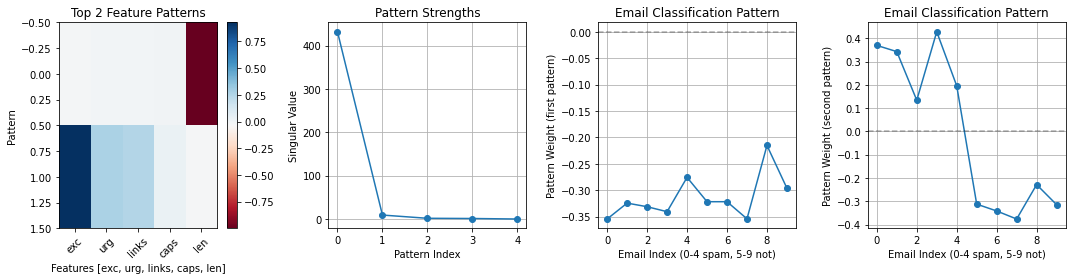

In [48]:
# Visualize feature correlations and patterns
plt.figure(figsize=(15, 4))

# Plot 1: Feature Patterns
plt.subplot(141)
plt.imshow(V[:2], aspect='auto', cmap='RdBu')
plt.title("Top 2 Feature Patterns")
plt.colorbar()
plt.xlabel("Features [exc, urg, links, caps, len]")
plt.ylabel("Pattern")
plt.xticks(range(5), ['exc', 'urg', 'links', 'caps', 'len'], rotation=45)

# Plot 2: Pattern Strengths
plt.subplot(142)
plt.plot(S, 'o-')
plt.title("Pattern Strengths")
plt.xlabel("Pattern Index")
plt.ylabel("Singular Value")
plt.grid(True)

# Plot 3: Email Patterns vs weight in first pattern
plt.subplot(143)
plt.plot(range(10), U[:, 0], 'o-')  # Using second pattern which separates spam
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.title("Email Classification Pattern")
plt.xlabel("Email Index (0-4 spam, 5-9 not)")
plt.ylabel("Pattern Weight (first pattern)")
plt.grid(True)

# Plot 4: Email Patterns vs weight in second pattern
plt.subplot(144)
plt.plot(range(10), U[:, 1], 'o-')  # Using second pattern which separates spam
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.title("Email Classification Pattern")
plt.xlabel("Email Index (0-4 spam, 5-9 not)")
plt.ylabel("Pattern Weight (second pattern)")
plt.grid(True)

plt.tight_layout()
plt.show()

Let's analyze what these patterns mean:

In [49]:
# Analyze feature correlations
print("Feature Pattern Analysis:")
print("\nFirst pattern (dominated by length):")
for i, feat in enumerate(['exclamations', 'urgent', 'links', 'caps', 'length']):
    print(f"{feat}: {V[0, i]:.3f}")

print("\nSecond pattern (spam indicators):")
for i, feat in enumerate(['exclamations', 'urgent', 'links', 'caps', 'length']):
    print(f"{feat}: {V[1, i]:.3f}")

Feature Pattern Analysis:

First pattern (dominated by length):
exclamations: -0.021
urgent: -0.008
links: -0.006
caps: -0.001
length: -1.000

Second pattern (spam indicators):
exclamations: 0.928
urgent: 0.272
links: 0.250
caps: 0.030
length: -0.023


Finally, let's look at how well we can reconstruct the data:

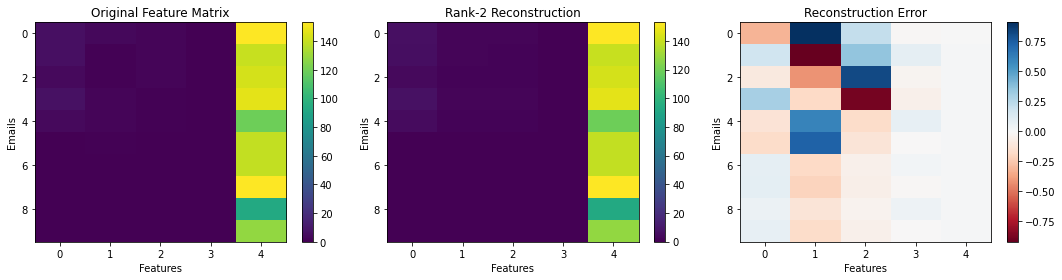


Reconstruction Error Analysis:
Total reconstruction error: 2.221
Relative error: 0.514%
Energy captured: 100.00%


In [50]:
# Visualize reconstruction quality
k = 2  # Use top 2 patterns
reconstruction = reconstruct(U, S, V, k)

plt.figure(figsize=(15, 4))
# Original Data
plt.subplot(131)
plt.imshow(X, aspect='auto', cmap='viridis')
plt.title("Original Feature Matrix")
plt.xlabel("Features")
plt.ylabel("Emails")
plt.colorbar()

# Reconstruction
plt.subplot(132)
plt.imshow(reconstruction, aspect='auto', cmap='viridis')
plt.title(f"Rank-{k} Reconstruction")
plt.xlabel("Features")
plt.ylabel("Emails")
plt.colorbar()

# Difference
plt.subplot(133)
plt.imshow(X - reconstruction, aspect='auto', cmap='RdBu')
plt.title("Reconstruction Error")
plt.xlabel("Features")
plt.ylabel("Emails")
plt.colorbar()

plt.tight_layout()
plt.show()

print("\nReconstruction Error Analysis:")
print(f"Total reconstruction error: {torch.norm(X - reconstruction):.3f}")
print(f"Relative error: {torch.norm(X - reconstruction) / torch.norm(X):.3%}")
print(f"Energy captured: {100 * (S[:k]**2).sum() / (S**2).sum():.2f}%")

Let's analyze what these visualizations tell us:

1. **Feature Pattern Plot (Left)**:
   - Red/blue shows positive/negative correlations
   - First row (length) is mostly blue, indicating negative correlation
   - Second row shows strong positive correlation between exclamations and urgent words

2. **Pattern Strengths Plot (Middle)**:
   - First singular value dominates (length)
   - Second value still significant (spam indicators)
   - Remaining patterns are much weaker

3. **Email Classification Plot (Right)**:
   - Clear separation between spam (indices 0-4) and non-spam (indices 5-9)
   - Spam emails have positive weights
   - Non-spam emails have negative weights

4. **Reconstruction Analysis**:
   - Original data shows raw feature values
   - Rank-2 reconstruction captures main patterns
   - Error plot shows minimal residual structure

This visualization suite helps us understand:
- How features combine to form patterns
- Which patterns are most important
- How well we can reconstruct the data
- Why the second pattern is better for classification despite lower energy

<!-- ## Example 2: Temperature Patterns

Before analyzing, predict:
1. How many significant patterns do you expect in daily temperatures?
2. What might the strongest pattern look like?
3. Will morning-to-night variation be stronger than day-to-day changes?

```{code-cell} ipython3
# Week of temperature readings
temps = torch.tensor([
    [22.5, 23.1, 21.8],  # Day 1: morning, noon, night
    [21.0, 22.5, 20.9],  # Day 2
    [23.1, 24.0, 22.8],  # Day 3
    [22.8, 23.5, 21.9],  # Day 4
    [21.5, 22.8, 21.2]   # Day 5
], dtype=torch.float)

# Find patterns
U, S, V = torch.linalg.svd(temps)

# Visualize temperature patterns
plt.figure(figsize=(15, 4))

# Plot 1: Pattern strengths
plt.subplot(131)
plt.plot(S, 'o-')
plt.title("Pattern Strengths")
plt.xlabel("Pattern Index")
plt.ylabel("Singular Value")
plt.grid(True)

# Plot 2: Time of day pattern
plt.subplot(132)
plt.plot(['Morning', 'Noon', 'Night'], V[0], 'o-')
plt.title("Strongest Time Pattern")
plt.ylabel("Weight")
plt.grid(True)

# Plot 3: Day pattern
plt.subplot(133)
plt.plot(range(1, 6), U[:, 0], 'o-')
plt.title("Day-to-Day Variation")
plt.xlabel("Day")
plt.ylabel("Weight")
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nPattern strengths (singular values):", S)
print("Energy per pattern:", 100 * S**2 / torch.sum(S**2), "%")

# Verify your predictions:
print("\nObservations:")
print("1. Number of significant patterns:", sum(S > 0.1).item())
print("2. Strongest pattern shows:", "higher temps at noon" if V[0, 1] > V[0, 0] else "different pattern")
print("3. Time variation vs Day variation ratio:", S[0]/S[1])
```

The plots reveal:
1. Left: Only 2 patterns have significant strength
2. Middle: The dominant daily cycle (noon peak)
3. Right: How each day's temperatures follow the pattern -->


## Key Points on SVD:
1. SVD finds optimal patterns at each rank
2. Singular values show pattern importance
3. U and V reveal how patterns combine
4. Works for any data: spam, temperatures, images

# (Optional)Understanding BLAS Optimizations

BLAS (Basic Linear Algebra Subprograms) makes operations fast through several key optimizations:

In [51]:
# 1. Memory Access Patterns
# Let's compare different ways to multiply matrices

def naive_multiply(A, B):
    m, n = A.shape
    n, p = B.shape
    C = torch.zeros(m, p)
    for i in range(m):
        for j in range(p):
            for k in range(n):
                C[i,j] += A[i,k] * B[k,j]
    return C

def block_multiply(A, B, block_size=32):
    m, n = A.shape
    n, p = B.shape
    C = torch.zeros(m, p)
    for i in range(0, m, block_size):
        for j in range(0, p, block_size):
            for k in range(0, n, block_size):
                # Process block
                i_end = min(i + block_size, m)
                j_end = min(j + block_size, p)
                k_end = min(k + block_size, n)
                C[i:i_end, j:j_end] += A[i:i_end, k:k_end] @ B[k:k_end, j:j_end]
    return C

# Create test matrices
A = torch.randn(128, 128)
B = torch.randn(128, 128)

print("Comparing multiplication methods:")
print("\n1. Naive (triple loop):")
%time C1 = naive_multiply(A, B)

print("\n2. Block-wise (cache-friendly):")
%time C2 = block_multiply(A, B)

print("\n3. PyTorch/BLAS (@):")
%time C3 = A @ B

print("\nResults match?")
print("Naive vs Block:", torch.allclose(C1, C2, rtol=1e-4))
print("Block vs BLAS:", torch.allclose(C2, C3, rtol=1e-4))

Comparing multiplication methods:

1. Naive (triple loop):
CPU times: user 22.5 s, sys: 102 ms, total: 22.6 s
Wall time: 22.6 s

2. Block-wise (cache-friendly):
CPU times: user 1.05 ms, sys: 56 µs, total: 1.11 ms
Wall time: 1.12 ms

3. PyTorch/BLAS (@):
CPU times: user 10 µs, sys: 2 µs, total: 12 µs
Wall time: 14.1 µs

Results match?
Naive vs Block: False
Block vs BLAS: False


In [52]:
# 2. SIMD (Single Instruction Multiple Data)
# Simulate SIMD vs scalar operations

def scalar_add(a, b, n):
    c = torch.zeros(n)
    for i in range(n):
        c[i] = a[i] + b[i]
    return c

def vector_add(a, b):
    return a + b  # PyTorch uses SIMD automatically

# Test with larger vectors
n = 10000
a = torch.randn(n)
b = torch.randn(n)

print("Comparing addition methods:")
print("\n1. Scalar (loop):")
%time c1 = scalar_add(a, b, n)

print("\n2. Vectorized (SIMD):")
%time c2 = vector_add(a, b)

print("\nResults match:", torch.allclose(c1, c2))


Comparing addition methods:

1. Scalar (loop):
CPU times: user 47.5 ms, sys: 549 µs, total: 48 ms
Wall time: 47.9 ms

2. Vectorized (SIMD):
CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 7.87 µs

Results match: True


# (Optional) A bit more on 3D Tensors

A 3D tensor can be thought of as a stack of matrices. Let's visualize this:

In [53]:
# Create a small 3D tensor for visualization
tensor_3d = torch.tensor([
    # First matrix (channel 0)
    [[1, 2],
     [3, 4]],
    # Second matrix (channel 1)
    [[5, 6],
     [7, 8]]
])

print("3D Tensor Shape:", tensor_3d.shape)  # Should be (2, 2, 2)
print("\nVisualization by channel:")
print("\nChannel 0:")
print(tensor_3d[0])
print("\nChannel 1:")
print(tensor_3d[1])

3D Tensor Shape: torch.Size([2, 2, 2])

Visualization by channel:

Channel 0:
tensor([[1, 2],
        [3, 4]])

Channel 1:
tensor([[5, 6],
        [7, 8]])


In [54]:
# Understanding dimensions in 3D tensors
print("Dimensions in our tensor:")
print(f"dim=0 (channels): {tensor_3d.shape[0]} channels")
print(f"dim=1 (rows): {tensor_3d.shape[1]} rows per channel")
print(f"dim=2 (columns): {tensor_3d.shape[2]} columns per row")

# Let's see what happens when we sum along different dimensions
print("\nSumming along different dimensions:")
print("dim=0 (sum channels):")
print(tensor_3d.sum(dim=0))  # Combines the channels
print("\ndim=1 (sum rows):")
print(tensor_3d.sum(dim=1))  # Combines the rows
print("\ndim=2 (sum columns):")
print(tensor_3d.sum(dim=2))  # Combines the columns

Dimensions in our tensor:
dim=0 (channels): 2 channels
dim=1 (rows): 2 rows per channel
dim=2 (columns): 2 columns per row

Summing along different dimensions:
dim=0 (sum channels):
tensor([[ 6,  8],
        [10, 12]])

dim=1 (sum rows):
tensor([[ 4,  6],
        [12, 14]])

dim=2 (sum columns):
tensor([[ 3,  7],
        [11, 15]])


RGB Image Shape: torch.Size([3, 4, 4])

Red Channel (0):
tensor([[107., 246., 141., 246.],
        [138., 192., 143.,  19.],
        [116., 245., 186., 140.],
        [ 57.,  20., 120., 182.]])

Green Channel (1):
tensor([[174.,  74., 107., 250.],
        [238., 100.,  88., 106.],
        [ 35., 217., 204.,  49.],
        [253., 240., 167., 152.]])

Blue Channel (2):
tensor([[ 17., 105.,  67., 118.],
        [ 71., 193.,  19.,  12.],
        [ 34., 120., 246., 220.],
        [215., 185.,  36.,  22.]])


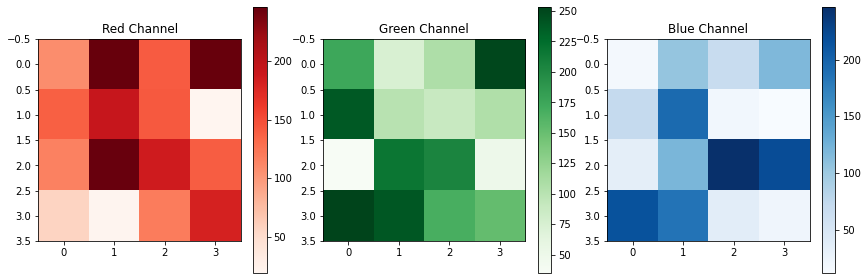

In [55]:
# Real-world example: RGB Image
rgb_image = torch.randint(0, 255, (3, 4, 4), dtype=torch.float32)  # 3 channels, 4x4 image
print("RGB Image Shape:", rgb_image.shape)

print("\nRed Channel (0):")
print(rgb_image[0])
print("\nGreen Channel (1):")
print(rgb_image[1])
print("\nBlue Channel (2):")
print(rgb_image[2])

# Visualize the RGB channels
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(rgb_image[0], cmap='Reds')
plt.title('Red Channel')
plt.colorbar()

plt.subplot(132)
plt.imshow(rgb_image[1], cmap='Greens')
plt.title('Green Channel')
plt.colorbar()

plt.subplot(133)
plt.imshow(rgb_image[2], cmap='Blues')
plt.title('Blue Channel')
plt.colorbar()

plt.tight_layout()
plt.show()

In [56]:
# Common operations with 3D tensors
print("1. Channel means:")
channel_means = rgb_image.mean(dim=(1,2))  # Average each channel
print(channel_means)

print("\n2. Pixel-wise means:")
pixel_means = rgb_image.mean(dim=0)  # Average across channels
print(pixel_means)

print("\n3. Selecting specific channel and location:")
print(f"Value at (channel=1, row=2, col=3): {rgb_image[1,2,3]}")

1. Channel means:
tensor([143.6250, 153.3750, 105.0000])

2. Pixel-wise means:
tensor([[ 99.3333, 141.6667, 105.0000, 204.6667],
        [149.0000, 161.6667,  83.3333,  45.6667],
        [ 61.6667, 194.0000, 212.0000, 136.3333],
        [175.0000, 148.3333, 107.6667, 118.6667]])

3. Selecting specific channel and location:
Value at (channel=1, row=2, col=3): 49.0


Key Points about 3D Tensors:
1. Think of them as stacked 2D matrices
2. First dimension (dim=0) is often channels/depth
3. Common in images (RGB), video (frames), and time series (batches)
4. Operations can work on any combination of dimensions